<h1 align=center><font size = 5><b>Automobiles price prediction project</b></font></h1>

<h2 align=center><font size = 5><b>Data cleaning</font></h2>

<h3 align=center><font size = 3><b>A project by Boris Y. Nedyalkov</b></font></h3>
<h3 align=center><font size = 3>With data courtesy of https://www.kaggle.com/code/toramky/eda-for-automobile-dataset</font></h3>

<center> <img src="https://img.freepik.com/premium-vector/car-front-view-bundle-cars-different-configuration-styles-set-modern-automobiles-motor-vehicles-illustration_106796-433.jpg" width=500, height=500 /></center> 

In [137]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [138]:
sns.set()

In [139]:
df = pd.read_csv("data//Automobile_data.csv")

In [140]:
pd.set_option('display.max_columns', None)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [142]:
# show some statistical information on the dataset (numerical)
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [143]:
# show some statistical information on the dataset (strings)
df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [144]:
# replace the "?" with NaNs
df.replace('?', np.nan, inplace=True)

In [145]:
# fix the dtypes
columns_to_fix = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for column in columns_to_fix:
        df[column] = pd.to_numeric(df[column])

Text(0.5, 1.0, 'Missing values heatmap')

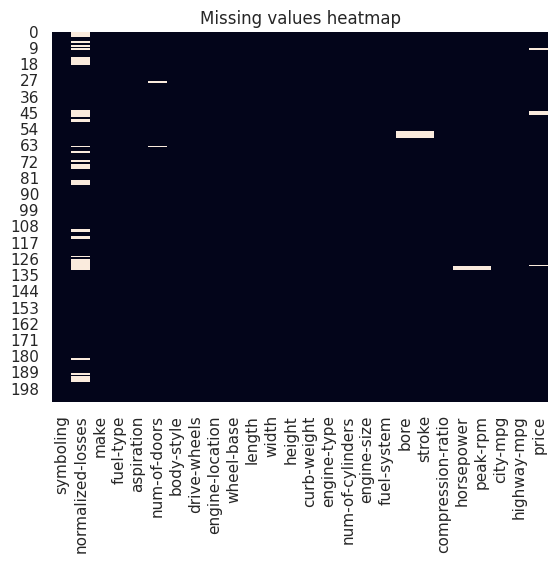

In [146]:
# look for missing values
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [147]:
# how many NaNs do we have
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

 Here we have some NaN values in some of the columns, in all of the columns except in the 'normalized-losses' one they are fairly few. So we will imputate them.
 However the 'normalized-losses' column has about 20% of its values equal to 'NaN'.
 That is a problem, the most fair solutions would be either to:
 
* Imputate them and move on
* Perform a replacement of the 'NaN' values with values learned from a ML algorithm (kNN - easy, unsupervised) or (traditional classificator (lets say RandomForest) where a model will be created based on the non-NaN rows and the NaN rows of 'normalized-losses' would be predicted from it)
* Drop the whole column with the 'NaNs' (this may work if the feature is not so important down the road, but this must be verified)

Here we'll take both approaches and explore the differences b/w the original data distribution and their distributions.

What I would NOT recommend would be to replace the NaNs by the mean/median/mode value of the 'normalized-losses' column (as many often do), due to the fact that these NaNs make about ~20% of the population and this could easily skew the data falsly.

In [148]:
# drop the rows with NaN except for the 'normalized-losses' one, they are very few and we can live without them
columns_to_check = ['num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df = df.dropna(subset=columns_to_check)

df.isnull().sum()

symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [149]:
df.count()[0]

/tmp/ipykernel_21141/1630707556.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.count()[0]


193

In [150]:
34/193

0.17616580310880828

The 'normalized-losses' NaNs ledt are about ~17.6% of the data, we will remove them, but first lets see if there is something special about those entries.

In [159]:
def knn_impute(df, k_neighbors=4):
    # Identify columns with NaN values
    columns_with_nan = df.columns[df.isna().any()].tolist()

    # Copy the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Iterate through columns with NaN values and perform k-NN imputation
    for column in columns_with_nan:
        imputer = KNNImputer(n_neighbors=k_neighbors)
        column_values = df_copy[[column]].values
        df_copy[column] = imputer.fit_transform(column_values)

    return df_copy

# performing kNN replacement
df_with_kNN = knn_impute(df)

# removing all the NaNs
df_nan_dropped = df.dropna()

# and for fun we will also make a df with the whole NaN-having column dropped
df_col_dropped = df.drop('normalized-losses', axis=1)

Now we will compare the distributions before and after

In [160]:
df_nan_dropped.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159,159,159,159,159,159,159,159.000000,159.000000,159.000000,159.000000,159.000000,159,159,159.000000,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,NaN,NaN,18,2,2,2,5,3,1,NaN,NaN,NaN,NaN,NaN,5,5,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,31,144,132,95,79,105,159,NaN,NaN,NaN,NaN,NaN,123,136,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.735849,121.132075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.264151,172.413836,65.607547,53.899371,2461.138365,NaN,NaN,119.226415,NaN,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.167416,11.523177,1.947883,2.268761,481.941321,NaN,NaN,30.460791,NaN,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,49.400000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,165.650000,64.000000,52.250000,2065.500000,NaN,NaN,97.000000,NaN,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.900000,172.400000,65.400000,54.100000,2340.000000,NaN,NaN,110.000000,NaN,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.800000,177.800000,66.500000,55.500000,2809.500000,NaN,NaN,135.000000,NaN,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000


In [162]:
df_col_dropped.describe(include='all')

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193,193,193,193,193,193,193,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
unique,NaN,21,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,5,6,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,174,158,112,92,114,190,NaN,NaN,NaN,NaN,NaN,141,153,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.923834,174.326425,65.893782,53.869948,2561.507772,NaN,NaN,128.124352,NaN,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.152409,12.478593,2.137795,2.394770,526.700026,NaN,NaN,41.590452,NaN,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.400000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,184.600000,66.900000,55.700000,2952.000000,NaN,NaN,146.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000


In [161]:
df_with_kNN.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193,193,193,193,193,193,193,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
unique,NaN,NaN,21,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,5,6,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,174,158,112,92,114,190,NaN,NaN,NaN,NaN,NaN,141,153,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797927,121.132075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.923834,174.326425,65.893782,53.869948,2561.507772,NaN,NaN,128.124352,NaN,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,32.340975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.152409,12.478593,2.137795,2.394770,526.700026,NaN,NaN,41.590452,NaN,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,121.132075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.400000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,184.600000,66.900000,55.700000,2952.000000,NaN,NaN,146.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000


In [163]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,159.000000,193,193,193,193,193,193,193,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
unique,NaN,NaN,21,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,5,6,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,174,158,112,92,114,190,NaN,NaN,NaN,NaN,NaN,141,153,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797927,121.132075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.923834,174.326425,65.893782,53.869948,2561.507772,NaN,NaN,128.124352,NaN,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,35.651285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.152409,12.478593,2.137795,2.394770,526.700026,NaN,NaN,41.590452,NaN,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,113.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.400000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,148.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,184.600000,66.900000,55.700000,2952.000000,NaN,NaN,146.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000


As we can see the kNN replacement mainted the distributions of the data very well. Also it seem stable when changing 'k_neighbors' parameters.

Small comment: (in a real world scenario, gone should for the machine learning part of the project, be vary of the imputed with replacement data, as it can give skew the model if not correct)

In [ ]:
###########

In [164]:
# export the datasets
df_with_kNN.to_csv('data//clean_data.csv',index=False)